## Wissarut Kanasub 6510545721

### Importing tools

In [385]:
# Import Tools.
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn import *

### Reaching data relative path.

In [386]:
# Reaching data relative path.
data_path = "DataFiles\laptopPrice.csv"

<>:2: SyntaxWarning: invalid escape sequence '\l'
<>:2: SyntaxWarning: invalid escape sequence '\l'
C:\Users\mazon\AppData\Local\Temp\ipykernel_6460\2420683551.py:2: SyntaxWarning: invalid escape sequence '\l'
  data_path = "DataFiles\laptopPrice.csv"


# *Data Exploration and Data preprocessing.*

### Reading data file with pandas.

In [387]:
# Reading data file with pandas.
original_data = pd.read_csv(data_path)
original_data.head(5)


,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


### Retirve Data shape and data type

In [388]:
# Retirve Data shape and data type
print("Data shape:",original_data.shape)
print("-------------------------------")
print(original_data.dtypes)
print("-------------------------------")

Data shape: (823, 19)
-------------------------------
brand                object
processor_brand      object
processor_name       object
processor_gnrtn      object
ram_gb               object
ram_type             object
ssd                  object
hdd                  object
os                   object
os_bit               object
graphic_card_gb      object
weight               object
warranty             object
Touchscreen          object
msoffice             object
Price                 int64
rating               object
Number of Ratings     int64
Number of Reviews     int64
dtype: object
-------------------------------


### Statistic Summary.

In [389]:
# Statistic description.
display(original_data.describe())

,Price,Number of Ratings,Number of Reviews
count,823.000000,823.000000,823.000000
mean,76745.177400,315.301337,37.609964
std,45101.790525,1047.382654,121.728017
min,16990.000000,0.000000,0.000000
25%,46095.000000,0.000000,0.000000
50%,64990.000000,17.000000,2.000000
75%,89636.000000,139.500000,18.000000
max,441990.000000,15279.000000,1947.000000


### Handle null values.

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

-------------------------------


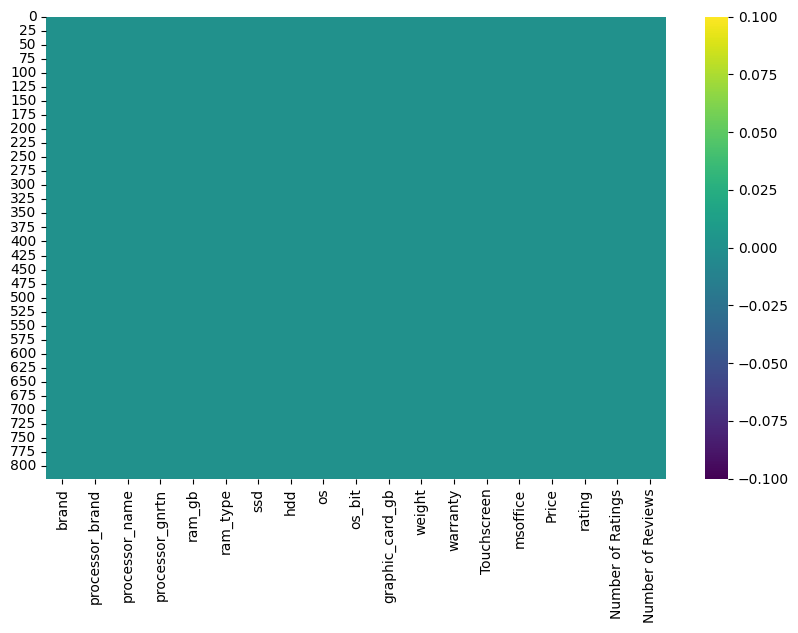

In [390]:
# Find null values.
display(original_data.isnull().sum())
print("-------------------------------")

# Display null values by seaborn heatmap.
plt.figure(figsize=(10, 6))
sns.heatmap(data=original_data.isnull(), cmap="viridis")
plt.show()

### Get column name

In [391]:
# Get numerical feautes.
numerical_features = original_data.select_dtypes(exclude="object").columns.tolist()
print("Numerical Featues:")
display(numerical_features)
print("-------------------------------")
# Get categorical featues.
categorical_features = original_data.select_dtypes(include="object").columns.tolist()
print("Categorical Featues:")
display(categorical_features)
print("-------------------------------")

Numerical Featues:


['Price', 'Number of Ratings', 'Number of Reviews']

-------------------------------
Categorical Featues:


['brand',
 'processor_brand',
 'processor_name',
 'processor_gnrtn',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'os',
 'os_bit',
 'graphic_card_gb',
 'weight',
 'warranty',
 'Touchscreen',
 'msoffice',
 'rating']

-------------------------------


### drop needless attributes.

In [392]:
# Drop needless attributes.
to_drop_columns = ['processor_name', 'processor_gnrtn', 'os', 'os_bit', 'weight', 'warranty', 'msoffice', 'Number of Ratings', 'Number of Reviews']
original_data.drop(to_drop_columns, axis=1, inplace=True)
display(original_data)

,brand,processor_brand,ram_gb,ram_type,ssd,hdd,graphic_card_gb,Touchscreen,Price,rating
0,ASUS,Intel,4 GB,DDR4,0 GB,1024 GB,0 GB,No,34649,2 stars
1,Lenovo,Intel,4 GB,DDR4,0 GB,1024 GB,0 GB,No,38999,3 stars
2,Lenovo,Intel,4 GB,DDR4,0 GB,1024 GB,0 GB,No,39999,3 stars
3,ASUS,Intel,8 GB,DDR4,512 GB,0 GB,2 GB,No,69990,3 stars
4,ASUS,Intel,4 GB,DDR4,0 GB,512 GB,0 GB,No,26990,3 stars
...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,4 GB,DDR4,1024 GB,0 GB,0 GB,No,135990,3 stars
819,ASUS,AMD,4 GB,DDR4,1024 GB,0 GB,0 GB,No,144990,3 stars
820,ASUS,AMD,4 GB,DDR4,1024 GB,0 GB,4 GB,No,149990,3 stars
821,ASUS,AMD,4 GB,DDR4,1024 GB,0 GB,4 GB,No,142990,3 stars


### Explore Categorical data.

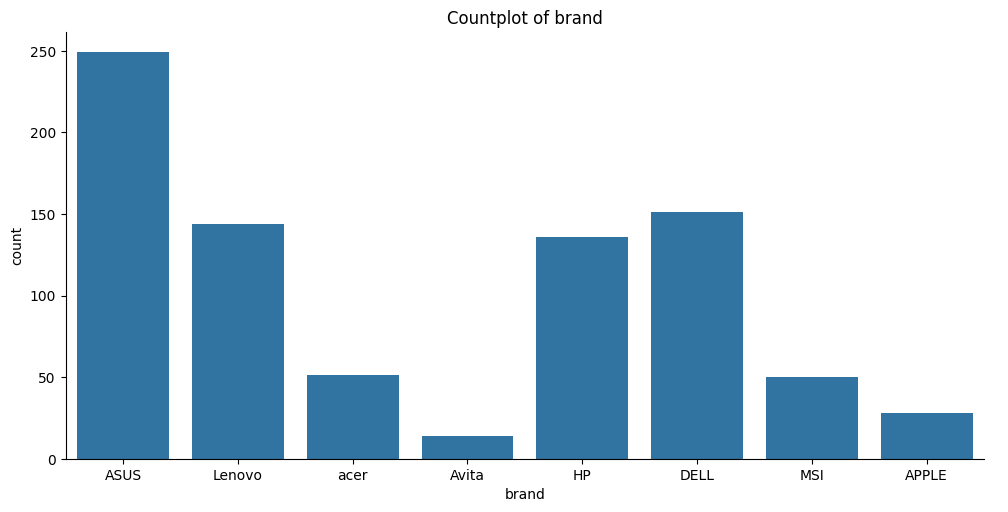

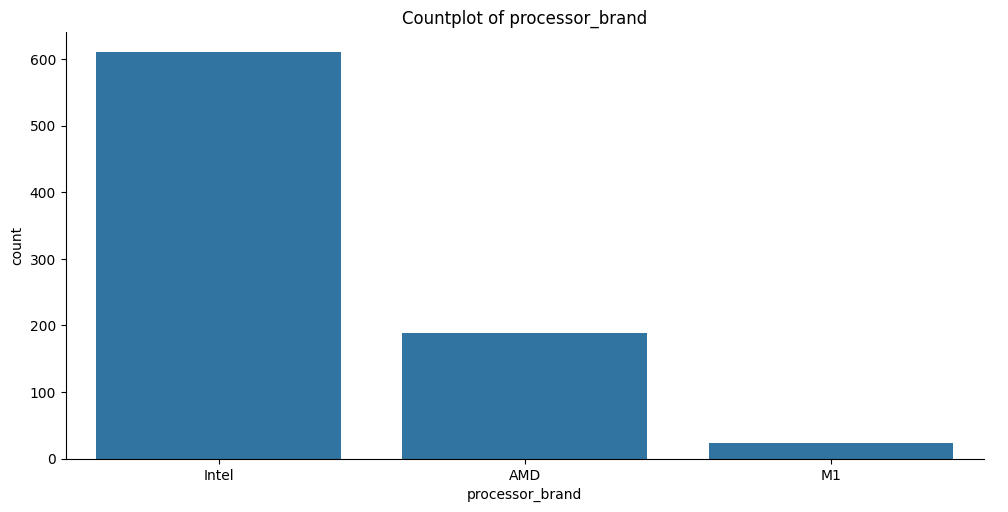

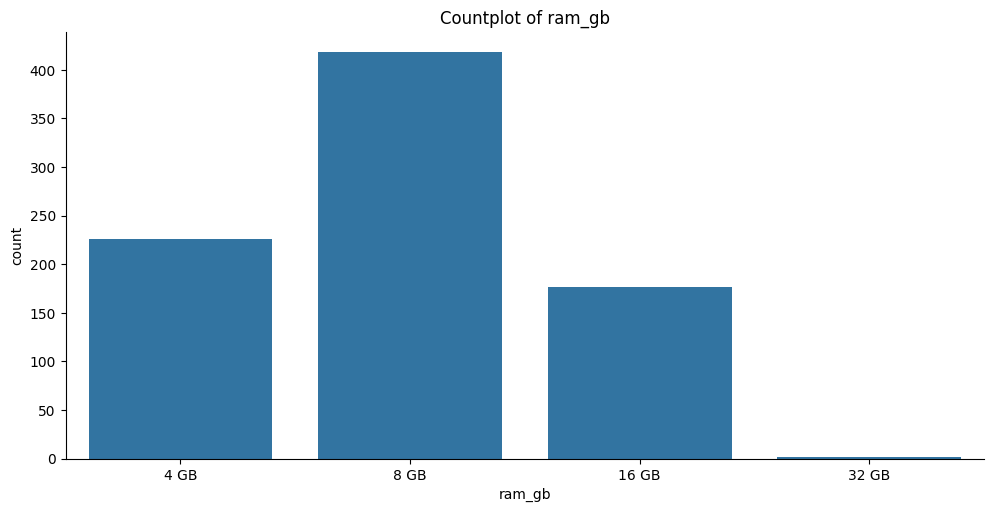

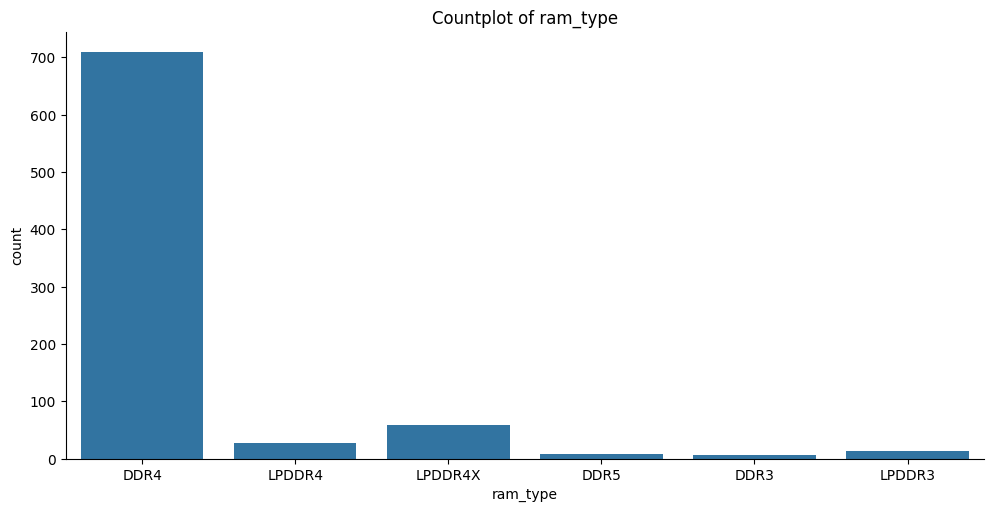

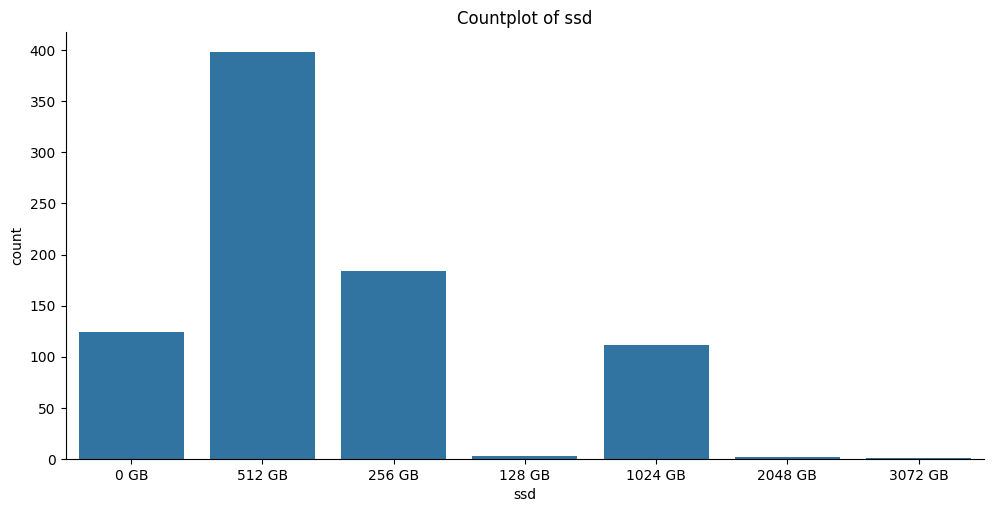

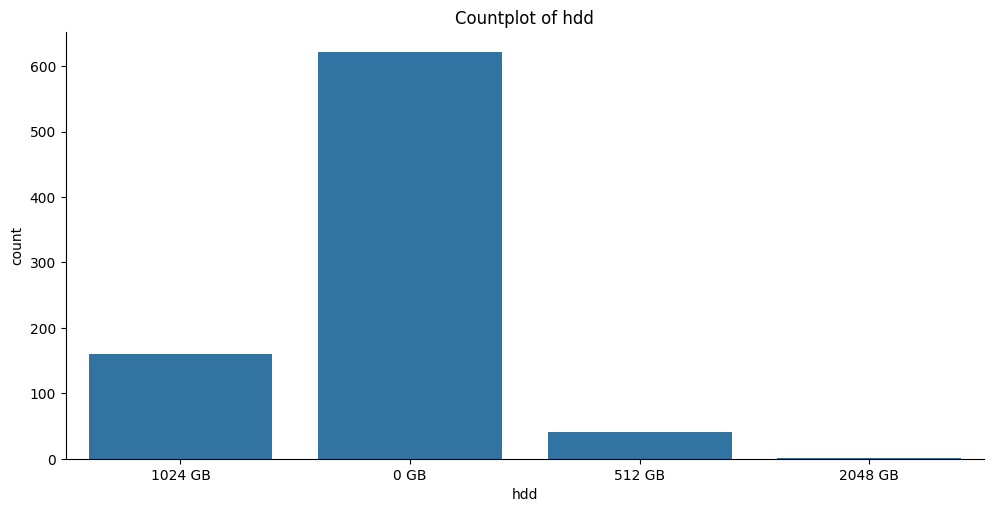

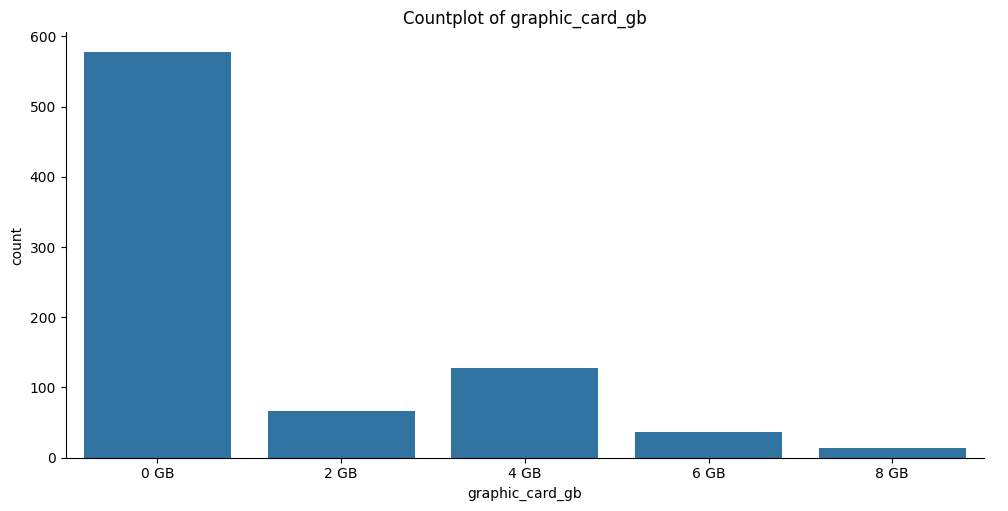

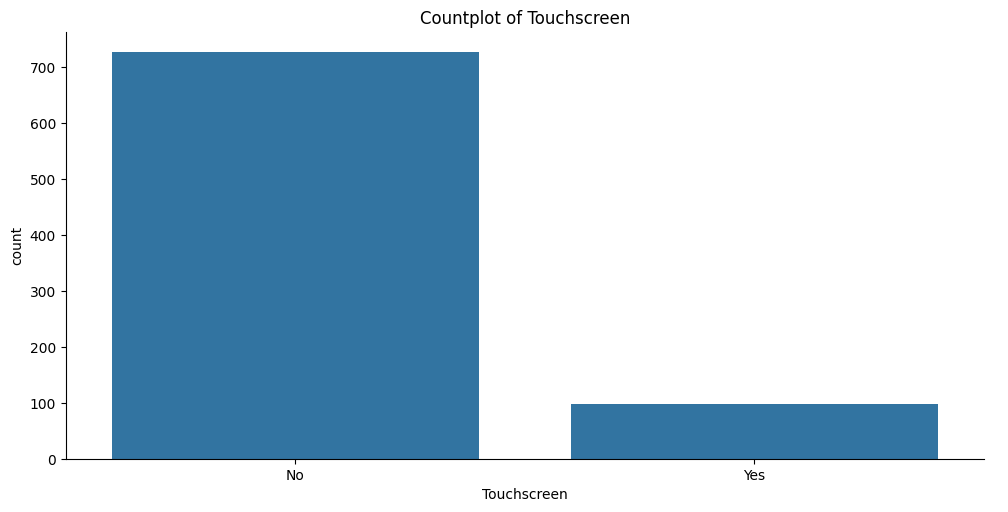

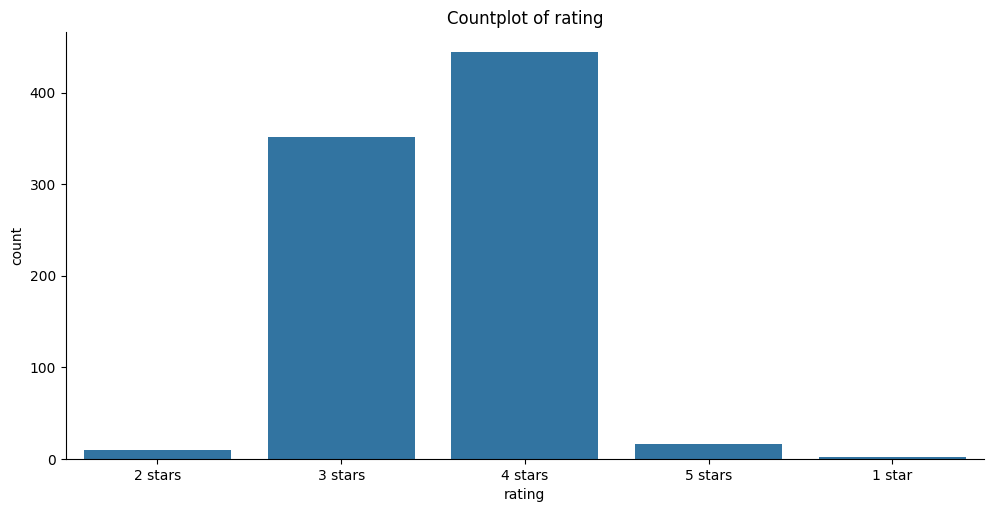

In [393]:
# Explore Categorical data by count plot.
categorical_features = original_data.select_dtypes(include="object").columns.tolist()

for col in categorical_features:
    sns.catplot(data=original_data, x=col, kind='count', aspect=2)
    plt.title(f'Countplot of {col}')
    plt.show()

### Explore Numerical data.

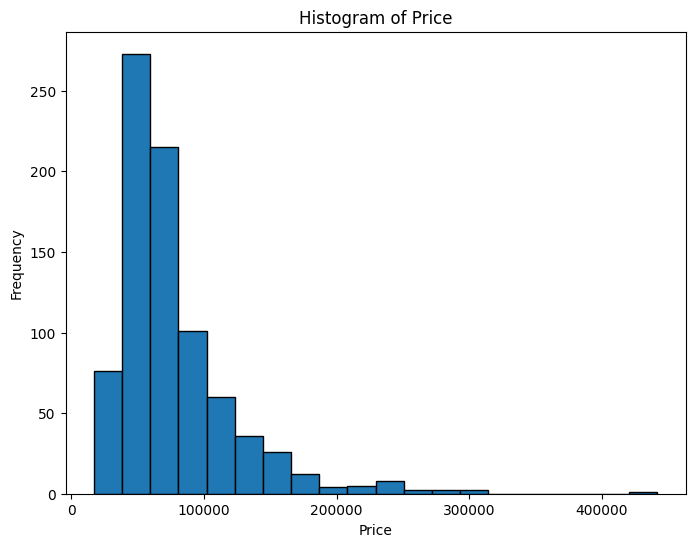

In [394]:
# Explore numerical data by histogram.
numerical_features = original_data.select_dtypes(exclude="object").columns.tolist()

# Create histograms for each numerical feature
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(original_data[col], bins=20, edgecolor='black')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {col}')
    plt.show()

### Fuction to cober categorical to numberical (If it have number in string)

In [395]:
# Function to covert categorical to numerical type.
def convert_categorical_to_numerical(data, column):
    # Extract the numerical part from the categorical data
    data[column] = data[column].str.extract('(\d+)').astype(float)
    return data

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\mazon\AppData\Local\Temp\ipykernel_6460\897080101.py:4: SyntaxWarning: invalid escape sequence '\d'
  data[column] = data[column].str.extract('(\d+)').astype(float)


### Convert categorical to numberical by above fuction.

In [396]:
# Converting Code Area.
to_convert_column = ['ram_gb', 'ssd', 'hdd', 'graphic_card_gb', 'rating'] # List of data to converting.
for col in to_convert_column:
    original_data = convert_categorical_to_numerical(original_data, col)

In [397]:
display(original_data)

,brand,processor_brand,ram_gb,ram_type,ssd,hdd,graphic_card_gb,Touchscreen,Price,rating
0,ASUS,Intel,4.0,DDR4,0.0,1024.0,0.0,No,34649,2.0
1,Lenovo,Intel,4.0,DDR4,0.0,1024.0,0.0,No,38999,3.0
2,Lenovo,Intel,4.0,DDR4,0.0,1024.0,0.0,No,39999,3.0
3,ASUS,Intel,8.0,DDR4,512.0,0.0,2.0,No,69990,3.0
4,ASUS,Intel,4.0,DDR4,0.0,512.0,0.0,No,26990,3.0
...,...,...,...,...,...,...,...,...,...,...
818,ASUS,AMD,4.0,DDR4,1024.0,0.0,0.0,No,135990,3.0
819,ASUS,AMD,4.0,DDR4,1024.0,0.0,0.0,No,144990,3.0
820,ASUS,AMD,4.0,DDR4,1024.0,0.0,4.0,No,149990,3.0
821,ASUS,AMD,4.0,DDR4,1024.0,0.0,4.0,No,142990,3.0


In [398]:
# Get numerical feautes.
numerical_features = original_data.select_dtypes(exclude="object").columns.tolist()
print("Numerical Featues:")
display(numerical_features)
print("-------------------------------")
# Get categorical featues.
categorical_features = original_data.select_dtypes(include="object").columns.tolist()
print("Categorical Featues:")
display(categorical_features)
print("-------------------------------")

Numerical Featues:


['ram_gb', 'ssd', 'hdd', 'graphic_card_gb', 'Price', 'rating']

-------------------------------
Categorical Featues:


['brand', 'processor_brand', 'ram_type', 'Touchscreen']

-------------------------------


### Use labelEncoder to Encoder.

In [399]:
# Convert categorical to numberical with Label Encoder. This use only Unique data.
to_convert_column = ['brand', 'processor_brand', 'ram_type', 'Touchscreen']
label_encoder = preprocessing.LabelEncoder() # Create object.

for col in to_convert_column:
    original_data[col] = label_encoder.fit_transform(original_data[col])
    display(f"{col}: {dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))}")

display(original_data)

"brand: {'APPLE': 0, 'ASUS': 1, 'Avita': 2, 'DELL': 3, 'HP': 4, 'Lenovo': 5, 'MSI': 6, 'acer': 7}"

"processor_brand: {'AMD': 0, 'Intel': 1, 'M1': 2}"

"ram_type: {'DDR3': 0, 'DDR4': 1, 'DDR5': 2, 'LPDDR3': 3, 'LPDDR4': 4, 'LPDDR4X': 5}"

"Touchscreen: {'No': 0, 'Yes': 1}"

,brand,processor_brand,ram_gb,ram_type,ssd,hdd,graphic_card_gb,Touchscreen,Price,rating
0,1,1,4.0,1,0.0,1024.0,0.0,0,34649,2.0
1,5,1,4.0,1,0.0,1024.0,0.0,0,38999,3.0
2,5,1,4.0,1,0.0,1024.0,0.0,0,39999,3.0
3,1,1,8.0,1,512.0,0.0,2.0,0,69990,3.0
4,1,1,4.0,1,0.0,512.0,0.0,0,26990,3.0
...,...,...,...,...,...,...,...,...,...,...
818,1,0,4.0,1,1024.0,0.0,0.0,0,135990,3.0
819,1,0,4.0,1,1024.0,0.0,0.0,0,144990,3.0
820,1,0,4.0,1,1024.0,0.0,4.0,0,149990,3.0
821,1,0,4.0,1,1024.0,0.0,4.0,0,142990,3.0


## Conclusion

After preprocessing the data and encoding categorical features, we transformed the categorical variables into numerical representations suitable for machine learning models.

### Categorical Encoding:

- **Brand**: We encoded the brand names into numerical values as follows: 'APPLE': 0, 'ASUS': 1, 'Avita': 2, 'DELL': 3, 'HP': 4, 'Lenovo': 5, 'MSI': 6, 'acer': 7.
- **Processor Brand**: The processor brands were encoded as 'AMD': 0, 'Intel': 1, 'M1': 2.
- **RAM Type**: We mapped RAM types to numerical values: 'DDR3': 0, 'DDR4': 1, 'DDR5': 2, 'LPDDR3': 3, 'LPDDR4': 4, 'LPDDR4X': 5.
- **Touchscreen**: For touchscreen availability, we encoded 'No' as 0 and 'Yes' as 1.

By converting categorical variables into numerical representations, we enabled machine learning algorithms to process the data effectively for model training and evaluation.



### Pot BloxPlot to find outliers.

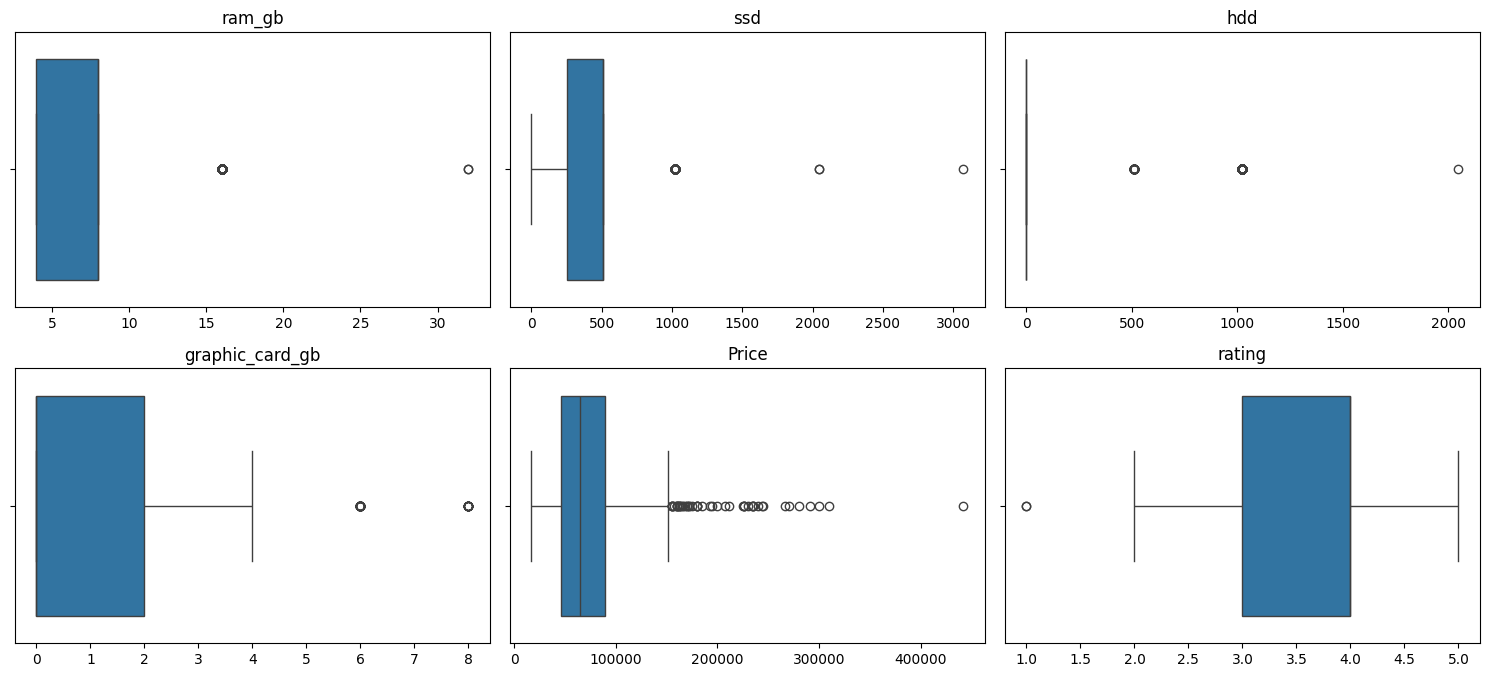

In [400]:
# Plot box plots for each numerical feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=original_data[feature])
    plt.title(feature)
    plt.xlabel('')
plt.tight_layout()
plt.show()

### Function to replace outliers with mode.

In [401]:
def replace_outliers_with_mode(data, columns):
    for col in columns:
        mode_val = data[col].mode()[0]  # Calculate the mode for the column
        Q1 = data[col].quantile(0.25)  # First quartile
        Q3 = data[col].quantile(0.75)  # Third quartile
        IQR = Q3 - Q1  # Interquartile range
        
        # Define the outlier thresholds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Replace outliers with mode
        data[col] = data[col].apply(lambda x: mode_val if x < lower_bound or x > upper_bound else x)
    
    return data

### Replace rating's outliers with mode.

In [402]:
# Replacing outliers with mode beacuse some of data is discrete type such as Size of memory, Rating or Stars
to_replace_with_mode = ['rating']

for col in to_replace_with_mode:
    original_data = replace_outliers_with_mode(original_data, [col])

display(original_data)

,brand,processor_brand,ram_gb,ram_type,ssd,hdd,graphic_card_gb,Touchscreen,Price,rating
0,1,1,4.0,1,0.0,1024.0,0.0,0,34649,2.0
1,5,1,4.0,1,0.0,1024.0,0.0,0,38999,3.0
2,5,1,4.0,1,0.0,1024.0,0.0,0,39999,3.0
3,1,1,8.0,1,512.0,0.0,2.0,0,69990,3.0
4,1,1,4.0,1,0.0,512.0,0.0,0,26990,3.0
...,...,...,...,...,...,...,...,...,...,...
818,1,0,4.0,1,1024.0,0.0,0.0,0,135990,3.0
819,1,0,4.0,1,1024.0,0.0,0.0,0,144990,3.0
820,1,0,4.0,1,1024.0,0.0,4.0,0,149990,3.0
821,1,0,4.0,1,1024.0,0.0,4.0,0,142990,3.0


I replaced outliers with the mode only for the 'Rating' attribute because I believe that other numerical attributes, such as RAM memory, VGA capacity, HDD size, and SSD storage, are crucial factors affecting the price of laptops in real-world scenarios. This decision was made to ensure that the model's accuracy remains high and reflects the significant impact of these hardware specifications on laptop pricing. 

By retaining the integrity of these essential features, our data analytics approach aims to provide a more accurate understanding of the relationship between hardware attributes and laptop prices.


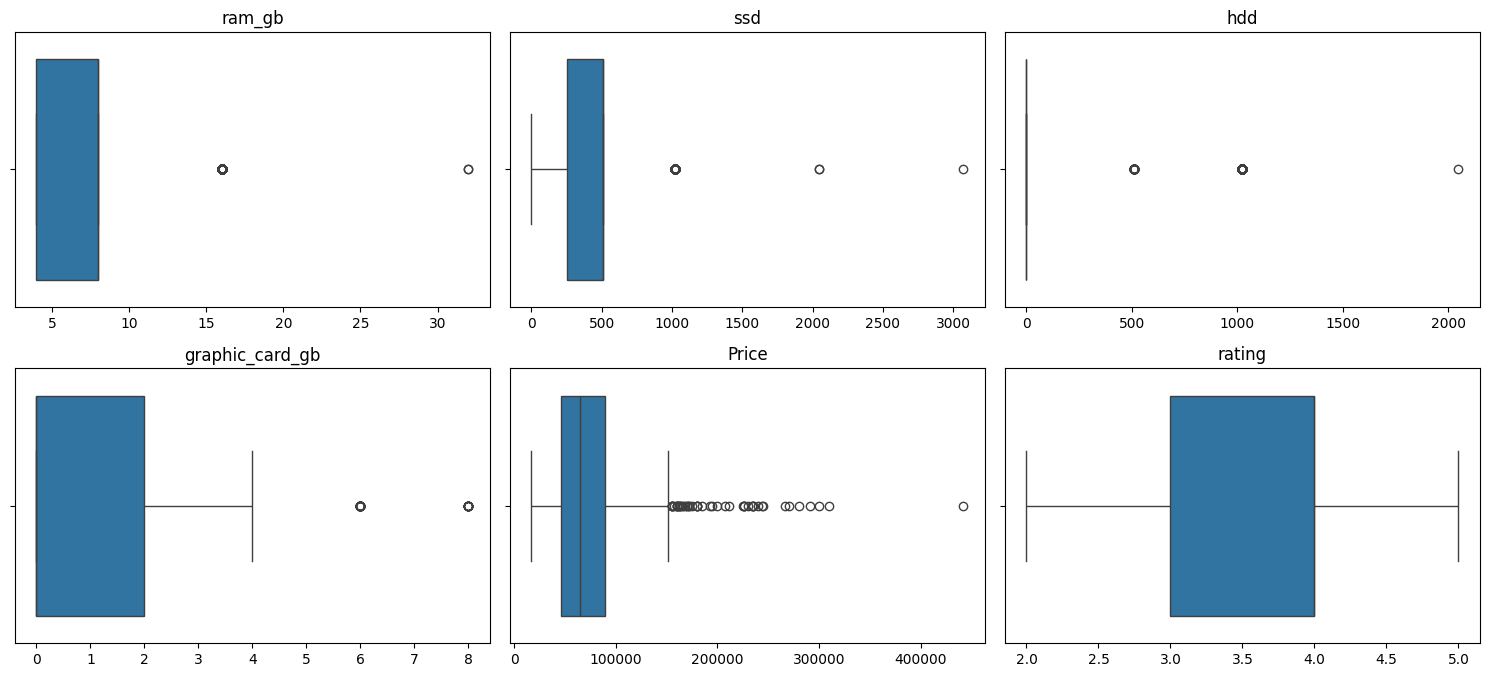

In [403]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features, start=1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=original_data[feature])
    plt.title(feature)
    plt.xlabel('')
plt.tight_layout()
plt.show()

#### Rating after replace by mode.

### Find Correlation.

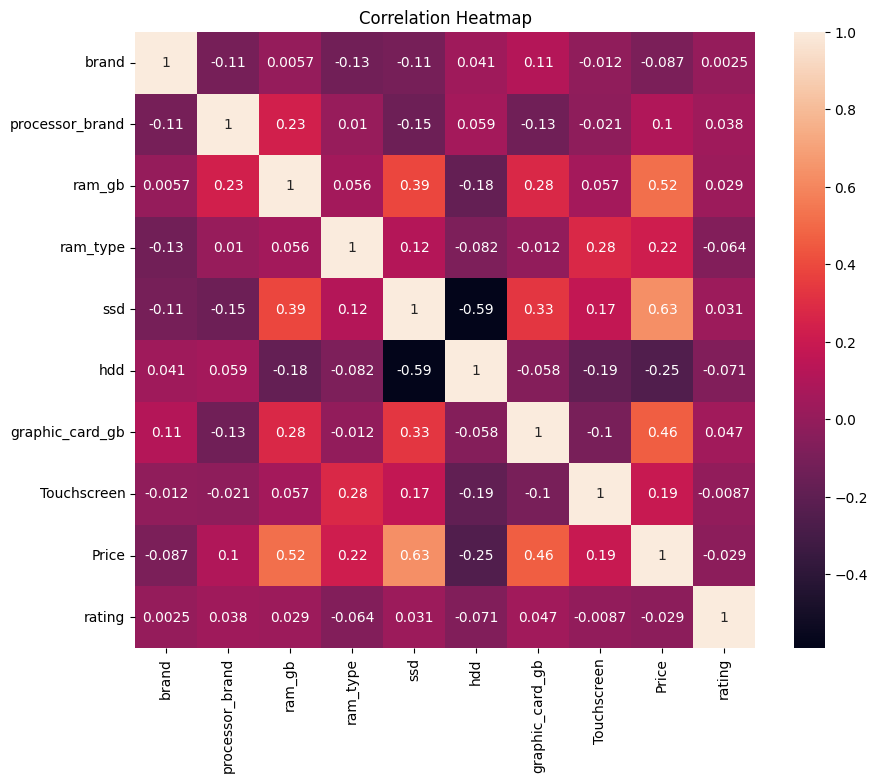

In [404]:
# Find Correlation by heatmap.
plt.figure(figsize=(10,8))
sns.heatmap(data=original_data.corr(), annot=True)
plt.title("Correlation Heatmap")
plt.show()

In [405]:
price_correlation = original_data.corr()['Price']

# Set a threshold for correlation
threshold = 0  # Adjust as needed

# Find columns with positive or negative correlation with "Price"
strong_correlation = price_correlation[(price_correlation > threshold) | (price_correlation < -threshold)]

print("Strong Correlation with Price:")
display(strong_correlation)

Strong Correlation with Price:


brand             -0.086642
processor_brand    0.100236
ram_gb             0.518323
ram_type           0.218425
ssd                0.628272
hdd               -0.252699
graphic_card_gb    0.459986
Touchscreen        0.189126
Price              1.000000
rating            -0.029033
Name: Price, dtype: float64

### No handle outliers data Boxplot.

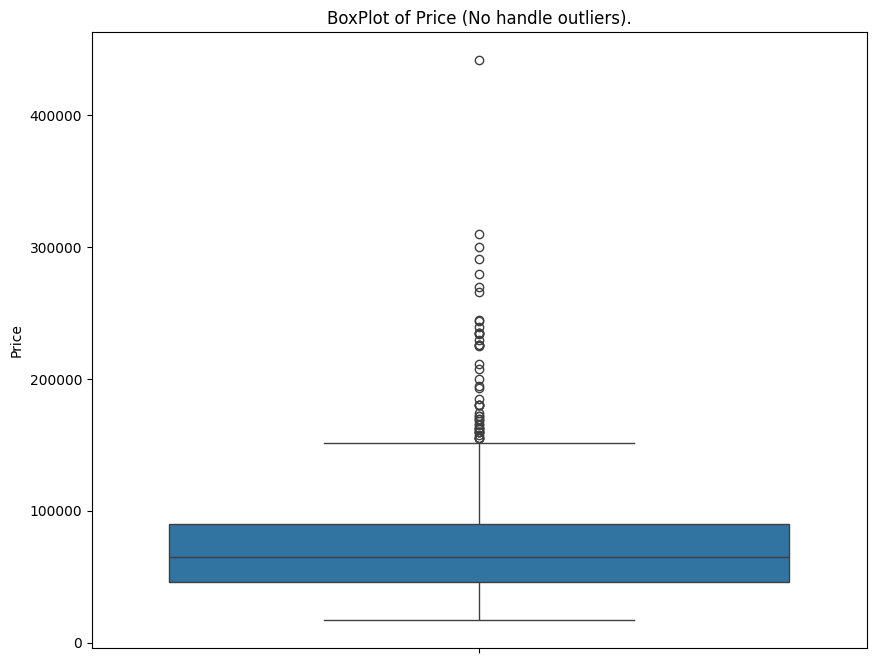

In [406]:
attribute = "Price"
data_no_handle_outliers = original_data.copy()

plt.figure(figsize=(10,8))
sns.boxplot(data=data_no_handle_outliers, y=attribute)
plt.title(f'BoxPlot of Price (No handle outliers).')
plt.show()

### Preprocessing with our interested technique (Replace outliers with mean)

In [407]:
def replace_outliers_with_mean(data, column):
    # Calculate mean
    mean_val = data[column].mean()
    # Calculate first and third quartiles
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # Calculate interquartile range (IQR)
    IQR = Q3 - Q1
    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Replace outliers with mean
    data[column] = data[column].apply(lambda x: mean_val if x < lower_bound or x > upper_bound else x)
    return data


### Data after replaced outliers with mean.

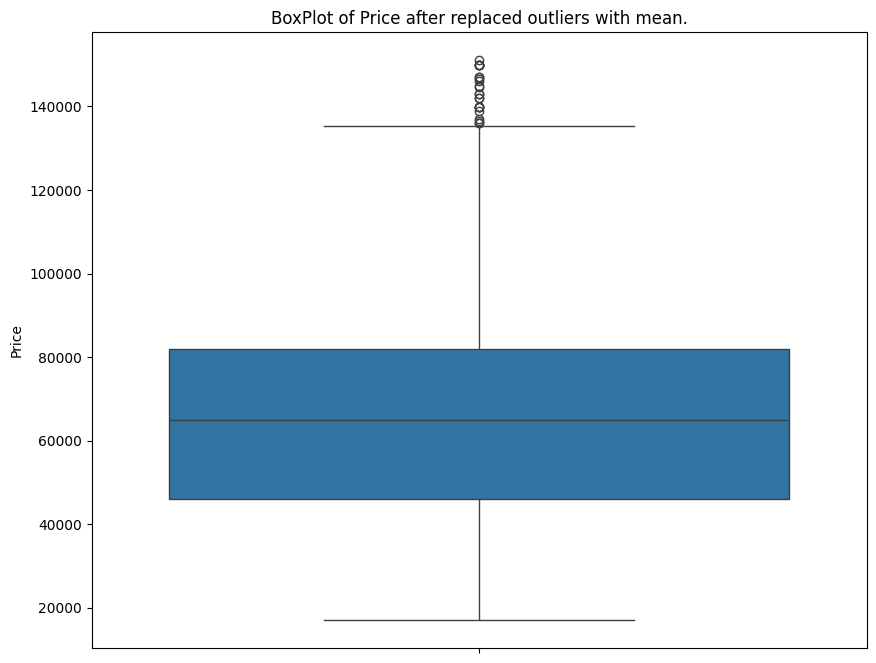

In [408]:
# Replace outliers with mean.
to_replace_with_mean = "Price"
data_outliers_replaced_with_mean = replace_outliers_with_mean(original_data, to_replace_with_mean)

plt.figure(figsize=(10,8))
sns.boxplot(data=data_outliers_replaced_with_mean, y=to_replace_with_mean)
plt.title(f'BoxPlot of Price after replaced outliers with mean.')
plt.show()

### Preprocessing with drop row that contian outliers.

In [409]:
def drop_rows_with_outliers(data, column):
    # Calculate first and third quartiles
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # Calculate interquartile range (IQR)
    IQR = Q3 - Q1
    # Define outlier thresholds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Drop rows containing outliers
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

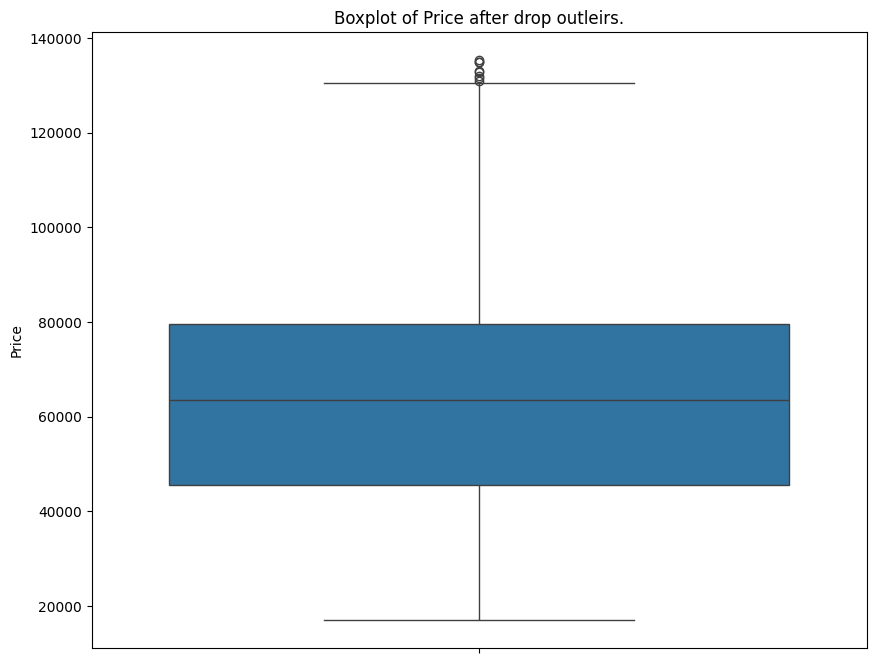

In [410]:
# Drop outliers
to_drop_outliers = "Price"
data_deleted_outliers = drop_rows_with_outliers(original_data, to_drop_outliers)

plt.figure(figsize=(10,8))
sns.boxplot(data=data_deleted_outliers, y=to_drop_outliers)
plt.title(f'Boxplot of Price after drop outleirs.')
plt.show()


##### Both techniques I only handle for one time because Replacing outliers multiple times 
#### can lead to distortion of the data and potentially skew the distribution.

# *Modeling Part*

For the three datasets: data_not_handle_outliers, data_replaced_outliers_with_mean, and data_drop_outliers, we will use a linear regression model to predict the "Price" of laptops. The predictor attributes used for modeling are consistent across all datasets.

### Linear Regression Modeling

We will employ a linear regression equation to predict the "Price" of laptops. This approach aims to capture the linear relationship between the predictor attributes and the target variable.

The predictor attributes considered in the modeling process include all available attributes in the dataset.

The three datasets, each processed differently with respect to handling outliers, will be utilized to assess the impact of outlier handling techniques on the performance of the linear regression model in predicting laptop prices.


In [411]:
original_data.columns.tolist()

['brand',
 'processor_brand',
 'ram_gb',
 'ram_type',
 'ssd',
 'hdd',
 'graphic_card_gb',
 'Touchscreen',
 'Price',
 'rating']

### Seting up for modeling constants.

In [412]:
import random

predictors = original_data.columns.tolist()
target = "Price"
state = random.randint(1,1000)
test_size = 0.3

In [420]:
print(state)

424


### Function to evaluate the model and linear regression equation.

In [413]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def evaluate_linear_regression(model, X_test, y_test):
    # Make predictions
    predictions = model.predict(X_test)
    
    # Print the linear regression equation
    print("Linear Regression Equation:")
    print("y =", model.intercept_, end=" ")
    for i, coef in enumerate(model.coef_):
        print("+", coef, "* X" + str(i+1), end=" ")
    print()
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mape = mean_absolute_percentage_error(y_test, predictions)
    
    # Print evaluation metrics
    print("\nEvaluation Metrics:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape}%")
    print(f"R-squared (R2) Score: {r2}")

### No handle outliers modeling

In [414]:
x_no_handle = data_no_handle_outliers[predictors]
x_no_handle = x_no_handle.drop(target, axis=1)
y_no_handle = data_no_handle_outliers[target]

# Split the data into training and testing sets.
x_no_handle_train, x_no_handle_test, y_no_handle_train, y_no_handle_test = model_selection.train_test_split(x_no_handle, y_no_handle, test_size=test_size, random_state=state)
# Scale train data.
scaler = preprocessing.StandardScaler()
x_no_handle_train_scaled = scaler.fit_transform(x_no_handle_train)
x_no_handle_test_scaled = scaler.transform(x_no_handle_test)
# Modeling
model_no_handle = linear_model.LinearRegression()
model_no_handle.fit(x_no_handle_train_scaled, y_no_handle_train)

LinearRegression()

### Replaced outliers with mean modeling.

In [415]:
x_replaced = data_outliers_replaced_with_mean[predictors]
x_replaced = x_replaced.drop(target, axis=1)
y_replaced = data_outliers_replaced_with_mean[target]

# Split the data into training and testing sets.
x_replaced_train, x_replaced_test, y_replaced_train, y_replaced_test = model_selection.train_test_split(x_replaced, y_replaced, test_size=test_size, random_state=state)
# Scale train data.
scaler = preprocessing.StandardScaler()
x_replaced_train_scaled = scaler.fit_transform(x_replaced_train)
x_replaced_test_scaled = scaler.transform(x_replaced_test)
# Modeling
model_replaced = linear_model.LinearRegression()
model_replaced.fit(x_replaced_train_scaled, y_replaced_train)

LinearRegression()

### Drop outlier modeling.

In [416]:
x_drop = data_deleted_outliers[predictors]
x_drop = x_drop.drop(target, axis=1)
y_drop = data_deleted_outliers[target]

# Split the data into training and testing sets.
x_drop_train, x_drop_test, y_drop_train, y_drop_test = model_selection.train_test_split(x_drop, y_drop, test_size=test_size, random_state=state)
# Scale train data.
scaler = preprocessing.StandardScaler()
x_drop_train_scaled = scaler.fit_transform(x_drop_train)
x_drop_test_scaled = scaler.transform(x_drop_test)
# Modeling
model_drop = linear_model.LinearRegression()
model_drop.fit(x_drop_train_scaled, y_drop_train)

LinearRegression()

# *Evaluate the Model Part.*

### No handle outliers.

In [417]:
display(evaluate_linear_regression(model_no_handle, x_no_handle_test_scaled, y_no_handle_test))

Linear Regression Equation:
y = 76285.80208333333 + -1532.0593777164684 * X1 + 6602.07049581297 * X2 + 8115.630381921212 * X3 + 6691.737896211984 * X4 + 23009.128810794486 * X5 + 5577.034158686634 * X6 + 14730.813802971967 * X7 + 4409.491770429817 * X8 + -2727.677220073838 * X9 

Evaluation Metrics:
Mean Absolute Error (MAE): 21007.946661981387
Mean Absolute Percentage Error (MAPE): 0.2762906546061745%
R-squared (R2) Score: 0.5299669578640092


None

### Replace outliers with mean.

In [418]:
display(evaluate_linear_regression(model_replaced, x_replaced_test_scaled, y_replaced_test))

Linear Regression Equation:
y = 68545.19102706898 + -921.1889963704775 * X1 + 393.17542371576565 * X2 + 5010.772916611506 * X3 + 5020.03276850384 * X4 + 6424.010789386979 * X5 + -1514.389141740546 * X6 + 8690.119460099218 * X7 + 5438.3378005020695 * X8 + -2430.378304377267 * X9 

Evaluation Metrics:
Mean Absolute Error (MAE): 15668.132215992451
Mean Absolute Percentage Error (MAPE): 0.24990356666833288%
R-squared (R2) Score: 0.44760738415495804


None

### Drop or delete row that contianing an Outliers.

In [419]:
display(evaluate_linear_regression(model_drop, x_drop_test_scaled, y_drop_test))

Linear Regression Equation:
y = 66372.31093081087 + -1462.2843145068343 * X1 + -97.03531086711337 * X2 + 6769.804834149995 * X3 + 3908.278411042359 * X4 + 5775.3388601279985 * X5 + -1434.016161915169 * X6 + 5669.883707374756 * X7 + 5401.637893582791 * X8 + -1344.1521450460768 * X9 

Evaluation Metrics:
Mean Absolute Error (MAE): 14043.478682948695
Mean Absolute Percentage Error (MAPE): 0.23249958454170241%
R-squared (R2) Score: 0.42771625645174205


None